In [31]:
'''Graph 1'''
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_excel('../data/multi-year-station-entry-and-exit-figures.xls',
                     sheet_name='2017 Entry & Exit (Zone 1)', skiprows=6)

df = pd.DataFrame(data)
df1 = pd.DataFrame(index=range(23), columns=['usage']).fillna(0)
df2 = df['Group Alphabet'].drop_duplicates().dropna().reset_index()

for x, poo in df1.iterrows():
    for y, lines in df.iterrows():
        if x == lines['Group Number']:
            poo['usage'] += lines['million']

#enter path-list here
list1 = [0,2,3,7]

df3 = pd.concat([df1, df2['Group Alphabet']], axis=1, join='inner').iloc[list1,:2]

fig = px.bar(df3, x="Group Alphabet", y="usage", title="entry/exit")
fig.show()

Empty DataFrame
Columns: []
Index: [262, 30, 49, 191, 228]


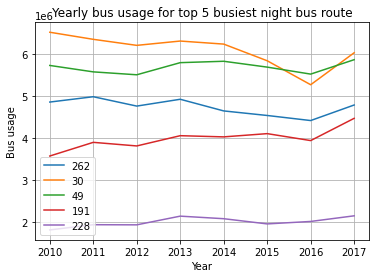

In [32]:
'''Graph 2'''

# List of top 5 worst bus routes at night according to Evening Standard
nightlist = [262,30,49,191,228]

# Creating dataframe for nightlist bus route usage using bus dataset
data = pd.ExcelFile('../data/bus-service-usage-18-19.xls')
df = pd.DataFrame(index=nightlist)
print(df)
for k in range(8):
    page = '201'+str(k)+'-201'+str(k+1)
    if k == 6:
        page = '2016-2017 original & rebased'
    df1 = pd.read_excel(data, sheet_name=page, skiprows=2).iloc[:,0:2].set_index("Route")
    df1 = df1.loc[(nightlist)]
    df = pd.concat([df, df1], axis=1)

year = pd.DataFrame({'Year':range(2010,2018)})
df = df.T.reset_index().drop(columns='index')
df = pd.concat([year,df], axis=1)

# Plotting multiple lines
for route in nightlist:
    plt.plot(df['Year'],df[route])

#Updating chart layout
plt.title('Yearly bus usage for top 5 busiest night bus route')
plt.xlabel('Year')
plt.ylabel('Bus usage')
plt.grid(True)
plt.legend(nightlist)
plt.show()